In [803]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from random import randint

In [804]:
def maps_func(x):
    x -= (t3 := x // 3) * 3
    t2 = x // 2
    return t3 * 12 + t2 * 7

prices = {
    "chest": lambda x: x * 5,
    "necklace": lambda x: x * 3,
    "barrel": lambda x: x * 1,
    "hook": lambda x: x * 1,
    "map": maps_func,
}
prices_list = [
    lambda x: x * 5,
    lambda x: x * 3,
    lambda x: x * 1,
    lambda x: x * 1,
    maps_func,
]
loot_names = [
    "chest",
    "necklace",
    "barrel",
    "hook",
    "map",
]

In [805]:
X_train = [
    [
        randint(0, 0),
        randint(0, 0),
        randint(0, 0),
        randint(0, 0),
        randint(0, 16)
    ]
    for _ in range(300)
]

In [806]:
X_train

[[0, 0, 0, 0, 13],
 [0, 0, 0, 0, 11],
 [0, 0, 0, 0, 16],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 15],
 [0, 0, 0, 0, 10],
 [0, 0, 0, 0, 15],
 [0, 0, 0, 0, 5],
 [0, 0, 0, 0, 14],
 [0, 0, 0, 0, 15],
 [0, 0, 0, 0, 16],
 [0, 0, 0, 0, 12],
 [0, 0, 0, 0, 12],
 [0, 0, 0, 0, 3],
 [0, 0, 0, 0, 13],
 [0, 0, 0, 0, 7],
 [0, 0, 0, 0, 14],
 [0, 0, 0, 0, 12],
 [0, 0, 0, 0, 10],
 [0, 0, 0, 0, 12],
 [0, 0, 0, 0, 11],
 [0, 0, 0, 0, 12],
 [0, 0, 0, 0, 6],
 [0, 0, 0, 0, 13],
 [0, 0, 0, 0, 10],
 [0, 0, 0, 0, 3],
 [0, 0, 0, 0, 7],
 [0, 0, 0, 0, 9],
 [0, 0, 0, 0, 14],
 [0, 0, 0, 0, 14],
 [0, 0, 0, 0, 14],
 [0, 0, 0, 0, 11],
 [0, 0, 0, 0, 7],
 [0, 0, 0, 0, 6],
 [0, 0, 0, 0, 6],
 [0, 0, 0, 0, 12],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 9],
 [0, 0, 0, 0, 13],
 [0, 0, 0, 0, 13],
 [0, 0, 0, 0, 11],
 [0, 0, 0, 0, 10],
 [0, 0, 0, 0, 16],
 [0, 0, 0, 0, 7],
 [0, 0, 0, 0, 10],
 [0, 0, 0, 0, 2],
 [0, 0, 0, 0, 9],
 [0, 0, 0, 0, 9],
 [0, 0, 0, 0, 13],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 13],
 [0, 0, 0, 0, 15],
 [0, 0, 0, 0

In [807]:
Y_train = [
    [sum([prices_list[i](x_arr[i]) for i in range(len(x_arr))])]
    for x_arr in X_train
]

In [808]:
X_train, Y_train = torch.Tensor(X_train), torch.Tensor(Y_train)

In [809]:
class SimpleLinearModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(5, 4),
            torch.nn.Sigmoid(),
            torch.nn.Linear(4, 1)
        )
    
    def forward(self, X):
        return self.layers(X)



In [810]:
game_model = SimpleLinearModel()

loss_fn = torch.nn.SmoothL1Loss()
optimizer = torch.optim.Adam(game_model.parameters(), lr=0.03)

In [811]:
def train_step(model: torch.nn.Module, x, y, loss_fn, optimizer):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

def test_step(model: torch.nn.Module, x, y, epoch, loss_fn):
    model.eval()
    with torch.inference_mode():
        test_y_pred = model(x)
        test_loss = loss_fn(test_y_pred, y)
        print(f"Epoch {epoch} | Test loss: {test_loss} | Test std {test_y_pred.squeeze().std()}")

In [812]:
loss_data = []
for epoch in range(10000):
    loss_data.append(train_step(game_model, X_train, Y_train, loss_fn, optimizer))
    test_step(game_model, x=X_train, y=Y_train, epoch=epoch, loss_fn=loss_fn)

Epoch 0 | Test loss: 31.640920639038086 | Test std 0.10678461939096451
Epoch 1 | Test loss: 31.53969383239746 | Test std 0.10768017172813416
Epoch 2 | Test loss: 31.437360763549805 | Test std 0.10944705456495285
Epoch 3 | Test loss: 31.332857131958008 | Test std 0.11261219531297684
Epoch 4 | Test loss: 31.22524070739746 | Test std 0.11752191185951233
Epoch 5 | Test loss: 31.113862991333008 | Test std 0.12436442077159882
Epoch 6 | Test loss: 30.99864959716797 | Test std 0.13315190374851227
Epoch 7 | Test loss: 30.88024139404297 | Test std 0.14360179007053375
Epoch 8 | Test loss: 30.759931564331055 | Test std 0.15504075586795807
Epoch 9 | Test loss: 30.639284133911133 | Test std 0.16655957698822021
Epoch 10 | Test loss: 30.51969337463379 | Test std 0.17737311124801636
Epoch 11 | Test loss: 30.402063369750977 | Test std 0.18707698583602905
Epoch 12 | Test loss: 30.2864933013916 | Test std 0.19564372301101685
Epoch 13 | Test loss: 30.1728515625 | Test std 0.20325890183448792
Epoch 14 | Tes

C:\Users\dewre\AppData\Local\Temp\ipykernel_18804\2953787053.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


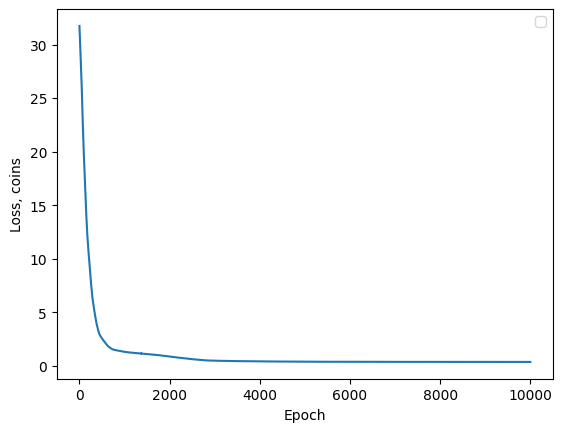

In [813]:
plt.plot([x for x in range(10000)], loss_data)
plt.xlabel('Epoch')
plt.ylabel('Loss, coins')
plt.legend()

In [814]:
dict(game_model.state_dict())

{'layers.0.weight': tensor([[-0.3852, -0.2927, -0.4143,  0.3496,  4.9779],
         [ 0.0741, -0.3306, -0.0378, -0.1142,  5.5217],
         [-0.0617, -0.3622, -0.1539, -0.2581,  4.1212],
         [-0.0302, -0.2133, -0.3404, -0.3625,  0.5673]]),
 'layers.0.bias': tensor([-54.4376, -43.8551, -57.3726,  -1.6421]),
 'layers.2.weight': tensor([[11.2796,  9.6794, 12.0286, 32.7888]]),
 'layers.2.bias': tensor([-5.6819])}

In [815]:
maps_data = game_model(torch.Tensor([[0, 0, 0, 0, x / 100] for x in range(2000)]))

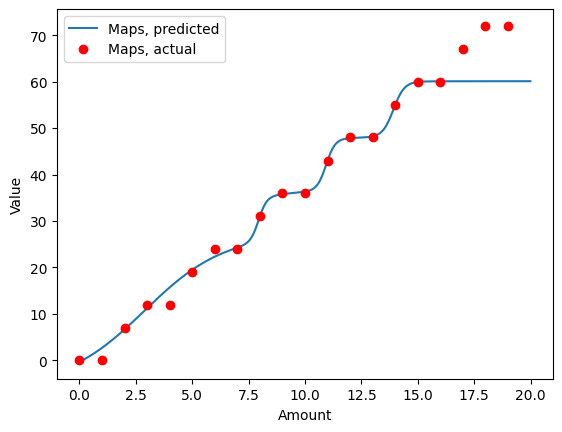

In [816]:
plt.plot([x / 100 for x in range(2000)], maps_data.detach().numpy(), label='Maps, predicted')
for x in range(20):
    actual_maps_val, = plt.plot(x, maps_func(x), 'ro')
actual_maps_val.set_label('Maps, actual')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.legend()
